<a href="https://colab.research.google.com/github/bhugopalan/Data-Models/blob/main/Credit_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Data
You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

### Task
Given a person’s credit-related information, build a machine learning model that can classify the credit score.
- ++ Data Source: Kaggle.
- ++ References :

# 1.Define Libraries

In [1]:
# Basic EDA & visualization modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import sklearn


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [ ]:
# Read dataset
df = pd.read_csv('creditscore_customerdata.csv', header =0,index_col = 'ID',low_memory=False)

- Recieved the below error in the read csv statement before using low_memory = false. I am using low memory as i shall be cleaning up the dataset and types in following steps.
- 
C:\Users\surbhu\AppData\Local\Temp\ipykernel_3044\1651732376.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('creditscore_customerdata.csv', index_col = 'ID')

#2.Exploratory Data Analysis

In [ ]:
#Data Sample
df.head()

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
#Shape
df.shape

(150000, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 0x1602 to 0x25ff1
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               150000 non-null  object 
 1   Month                     150000 non-null  object 
 2   Name                      135000 non-null  object 
 3   Age                       150000 non-null  object 
 4   SSN                       150000 non-null  object 
 5   Occupation                150000 non-null  object 
 6   Annual_Income             150000 non-null  object 
 7   Monthly_Inhand_Salary     127500 non-null  float64
 8   Num_Bank_Accounts         150000 non-null  int64  
 9   Num_Credit_Card           150000 non-null  int64  
 10  Interest_Rate             150000 non-null  int64  
 11  Num_of_Loan               150000 non-null  object 
 12  Type_of_Loan              132888 non-null  object 
 13  Delay_from_due_date       150000 non-null  

In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer_ID,150000,12500,CUS_0xd40,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,150000,12,January,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,135000,10139,Stevex,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,150000,2524,39,4198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSN,150000,12501,#F%$D@*&8,8400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,150000,16,_______,10500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,150000,21192,36585.12,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,127500.0,NaN,NaN,NaN,4190.115139,3180.489657,303.645417,1625.265833,3091.0,5948.454596,15204.63333
Num_Bank_Accounts,150000.0,NaN,NaN,NaN,17.00694,117.069476,-1.0,3.0,6.0,7.0,1798.0
Num_Credit_Card,150000.0,NaN,NaN,NaN,22.623447,129.143006,0.0,4.0,5.0,7.0,1499.0


In [ ]:
#check for duplicates
df.duplicated().sum()

0

>> No Duplicates

In [ ]:
# Null Checks - checking for missing values
df.isnull().sum()

Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit            0
Num_Credit_Inquiries         3000
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

In [ ]:
df['Credit_Mix'].value_counts(normalize='True')

Standard    0.36572
Good        0.24398
_           0.20000
Bad         0.19030
Name: Credit_Mix, dtype: float64

#3.Data Cleaning/Preprocessing

###3.1 Data Issues to be Fixed:
- Credit Score - we can ignore the credit score field as its predictor variable and the 50000 records for test data
- Other fields which i consider to be cleaned up (based on its utility to forecast credit score for test dataset)
    * Type_of_loan,Num of delayed payment, Monthly inhand salary, Credit History Age,Amount invested monthly,Monthly Balance
- Also we see that the dataset has a lot of hyphens and underscores(_____) in the values>> regardless of replacing NULL/suffixed to a value.Hence we need to handle the unwanted hyphens in the dataset. (NEEDS TO BE FIXED)


OVERALL:
- NAME & SSN are not useful . (NEED TO DROP columns)
- Dataset has got outliets
- Type of Loan has a lot of values in same field ( can use onehot encoding and replaced into multiple fields)
- Num_Bank_Accounts contains negative values
- Imbalanced Target data (Credit Mix field)
- Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Mix,Occupation Fields (needs Feature Engineering)

##3.2 Drop columns and data clean up

In [ ]:
# Drop Columns Name and SSN
df.drop(['Name','SSN'],axis = 1,inplace=True)

In [ ]:
# Removing Unwanted underscore and restore numerical values(float)
def rest_num(num):
    try : 
        return float(num.replace("_",""))
    except :
        return np.nan

In [ ]:
#Numerical fields
num_fields = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Amount_invested_monthly', 'Outstanding_Debt' , 'Monthly_Balance']
for c in num_fields:
    df[c]= df[c].apply(rest_num)

In [ ]:
df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [ ]:
df['Type_of_Loan'].value_counts().head(9)

Not Specified              2112
Credit-Builder Loan        1920
Personal Loan              1908
Debt Consolidation Loan    1896
Student Loan               1860
Payday Loan                1800
Mortgage Loan              1764
Auto Loan                  1728
Home Equity Loan           1704
Name: Type_of_Loan, dtype: int64

In [ ]:
#Type of Loan field has 8 unique values. One difficuty in using onehot encoding/get dummies function is that the values are not listed as series/list. 
#It has got new line values.Hence needed to write a for loop to accomplish it manually
for i in df['Type_of_Loan'].value_counts().head(9).index[1:] : 
    df[i] = df['Type_of_Loan'].str.contains(i)
df.drop(['Type_of_Loan'],axis = 1,inplace=True)

In [ ]:
#Num of Bank Accounts has negative values for 37 records
df['Num_Bank_Accounts'].value_counts().sort_index()

-1          37
 0        6494
 1        6743
 2        6456
 3       17905
         ...  
 1786        1
 1789        2
 1793        1
 1794        2
 1798        3
Name: Num_Bank_Accounts, Length: 1183, dtype: int64

In [ ]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].abs() # Using Python absolute function for negative value encoding

In [ ]:
df['Num_Bank_Accounts'].value_counts().sort_index()

0        6494
1        6780
2        6456
3       17905
4       18286
        ...  
1786        1
1789        2
1793        1
1794        2
1798        3
Name: Num_Bank_Accounts, Length: 1182, dtype: int64

In [ ]:
df['Num_of_Loan'] = df['Num_of_Loan'].abs() # Using Python absolute function for negative value encoding

In [ ]:
#Credit History Age has got NA . Rest of the records are of the format N Years and N Months.
df['Credit_History_Age'].value_counts().sort_index()

0 Years and 1 Months       2
0 Years and 10 Months     92
0 Years and 11 Months     93
0 Years and 2 Months      15
0 Years and 3 Months      20
                        ... 
9 Years and 5 Months     344
9 Years and 6 Months     340
9 Years and 7 Months     345
9 Years and 8 Months     353
9 Years and 9 Months     363
Name: Credit_History_Age, Length: 408, dtype: int64

In [ ]:
def fix_crhistage(age): # converting credit history age into months
    try:
        years = int("".join(re.findall('[0-9]',''.join(age.split("and")[0]))))
        months = int("".join(re.findall('[0-9]',''.join(age.split("and")[1]))))
        return (years * 12) + months
    except:
        np.nan

In [ ]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(fix_crhistage)

In [ ]:
df['Credit_History_Age'].value_counts()

215.0    628
220.0    621
219.0    617
237.0    615
218.0    615
        ... 
3.0       20
2.0       15
407.0     15
408.0     14
1.0        2
Name: Credit_History_Age, Length: 408, dtype: int64

In [ ]:
#Fix Payment of Min Amount field
df['Payment_of_Min_Amount'].value_counts()

Yes    78484
No     53516
NM     18000
Name: Payment_of_Min_Amount, dtype: int64

In [ ]:
#Change NM to No. Could be typo
df['Payment_of_Min_Amount'].replace("NM","No",inplace = True)

In [ ]:
#Fix Payment_Behaviour
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      38207
High_spent_Medium_value_payments    26462
Low_spent_Medium_value_payments     20698
High_spent_Large_value_payments     20565
High_spent_Small_value_payments     16991
Low_spent_Large_value_payments      15677
!@9#%8                              11400
Name: Payment_Behaviour, dtype: int64

In [ ]:
#Replace !@9#%8 as NAN
df['Payment_Behaviour'].replace("!@9#%8",np.nan,inplace=True)

In [ ]:
#Fix Credit Mix field (Very important)
df['Credit_Mix'].value_counts()

Standard    54858
Good        36597
_           30000
Bad         28545
Name: Credit_Mix, dtype: int64

In [ ]:
#Replace Good as 1, Bad as 0 and _ as nan
CM_map = {
    'Good' : 1,
    'Bad'  : 2,
    '_'    : np.nan
}

df['Credit_Mix'] = df['Credit_Mix'].map(CM_map)

In [ ]:
df['Credit_Mix'].value_counts()

1.0    36597
2.0    28545
Name: Credit_Mix, dtype: int64

In [ ]:
df['Occupation'].value_counts()

_______          10500
Lawyer            9899
Engineer          9562
Architect         9550
Mechanic          9459
Accountant        9404
Scientist         9403
Developer         9381
Media_Manager     9362
Teacher           9318
Entrepreneur      9277
Journalist        9122
Doctor            9114
Manager           8973
Musician          8858
Writer            8818
Name: Occupation, dtype: int64

In [ ]:
# We have monthly data for all customers. Hence for occupation where in there is ----, we need to impute with the occupation of the customer.
for custid in df[df['Occupation']== '_______']['Customer_ID']:
    oc = df[df['Customer_ID'] == custid]['Occupation'].mode()[0]
    df[df['Customer_ID'] == custid] = df[df['Customer_ID'] == custid].replace("_______",oc)

In [ ]:
df['Occupation'].value_counts()

Lawyer           10644
Engineer         10296
Architect        10236
Mechanic         10164
Scientist        10116
Accountant       10116
Developer        10080
Media_Manager    10080
Teacher          10008
Entrepreneur      9972
Doctor            9852
Journalist        9804
Manager           9648
Musician          9528
Writer            9456
Name: Occupation, dtype: int64

In [ ]:
#Handle Payment of min amount. Yes = 1, No = 0
Paymin_map = {
    'Yes' : 1,
    'No'  : 0
}

df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map(Paymin_map)

## 3.3 Handling Missing Values

In [ ]:
#Find data frame datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 0x1602 to 0x25ff1
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               150000 non-null  object 
 1   Month                     150000 non-null  object 
 2   Age                       150000 non-null  float64
 3   Occupation                150000 non-null  object 
 4   Annual_Income             150000 non-null  float64
 5   Monthly_Inhand_Salary     127500 non-null  float64
 6   Num_Bank_Accounts         150000 non-null  int64  
 7   Num_Credit_Card           150000 non-null  int64  
 8   Interest_Rate             150000 non-null  int64  
 9   Num_of_Loan               150000 non-null  float64
 10  Delay_from_due_date       150000 non-null  int64  
 11  Num_of_Delayed_Payment    139500 non-null  float64
 12  Changed_Credit_Limit      146850 non-null  float64
 13  Num_Credit_Inquiries      147000 non-null  

In [ ]:
df.isnull().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Credit_Mix                  84858
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour           11400
Monthly_Balance              1762
Credit_Score                50000
Credit-Builder Loan         17112
Personal Loan               17112
Debt Consolidation Loan     17112
Student Loan                17112
Payday Loan                 17112
Mortgage Loan 

In [ ]:
#Credit Score Mapping
m = {
    "Poor":0,
    "Standard":1,
    "Good":2
}
df['Credit_Score'] = df['Credit_Score'].map(m)

-  We can ignore object types and focus on imputing the missing values for numericals. Also Ignore credit score as its test data. Also convert last 8 columns(Type of Loan) into int( True=1 and False = 0)

In [ ]:
for col in list(df.columns[-8:]):
    df[col] = df[col].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 0x1602 to 0x25ff1
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               150000 non-null  object 
 1   Month                     150000 non-null  object 
 2   Age                       150000 non-null  float64
 3   Occupation                150000 non-null  object 
 4   Annual_Income             150000 non-null  float64
 5   Monthly_Inhand_Salary     127500 non-null  float64
 6   Num_Bank_Accounts         150000 non-null  int64  
 7   Num_Credit_Card           150000 non-null  int64  
 8   Interest_Rate             150000 non-null  int64  
 9   Num_of_Loan               150000 non-null  float64
 10  Delay_from_due_date       150000 non-null  int64  
 11  Num_of_Delayed_Payment    139500 non-null  float64
 12  Changed_Credit_Limit      146850 non-null  float64
 13  Num_Credit_Inquiries      147000 non-null  

In [ ]:
Num_variables = df.select_dtypes(exclude='object').columns[0:]
Num_variables

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan',
       'Student Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan',
       'Home Equity Loan'],
      dtype='object')

In [ ]:
#Convert customer id to serial numbering for imputing purpose
CI = 1 
for ID in df['Customer_ID'].unique() :
    df['Customer_ID'] = df['Customer_ID'].replace(ID,CI)
    CI += 1 

In [ ]:
df.head(20)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,1,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,312.494089,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
0x1603,1,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,284.629163,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
0x1604,1,March,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,...,331.209863,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
0x1605,1,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,223.451310,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
0x1606,1,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,341.489231,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
0x1607,1,June,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,340.479212,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
0x1608,1,July,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,244.565317,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
0x1609,1,August,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,358.124168,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
0x160e,2,January,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,...,470.690627,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# using KNN imputer (nearest neighbour) function to impute the missing values. Coz, a customer has multiple records for different months. Its convenient to impute based on the same customer's prev/next month statistics
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)

In [ ]:
for i in Num_variables[1:]:
    imputer.fit(df[['Customer_ID',i]])
    df[['Customer_ID',i]] = imputer.transform(df[['Customer_ID',i]])

In [ ]:
# Saving the data frame into a csv file for future use.
df.to_csv('processed_credit_score_df.csv')

In [ ]:
df.isnull().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour           11400
Monthly_Balance                 0
Credit_Score                    0
Credit-Builder Loan             0
Personal Loan                   0
Debt Consolidation Loan         0
Student Loan                    0
Payday Loan                     0
Mortgage Loan 

We could drop Payment Behaviour from the dataset as well as it doesnt significantly add much meaning given the values.
If required, can have the missing values filled by using simple imputer function


In [ ]:
#Drop payment_Behaviour
df1=df.drop('Payment_Behaviour',axis=1)

In [ ]:
#Identify correlation
df2=df1.head(100000)

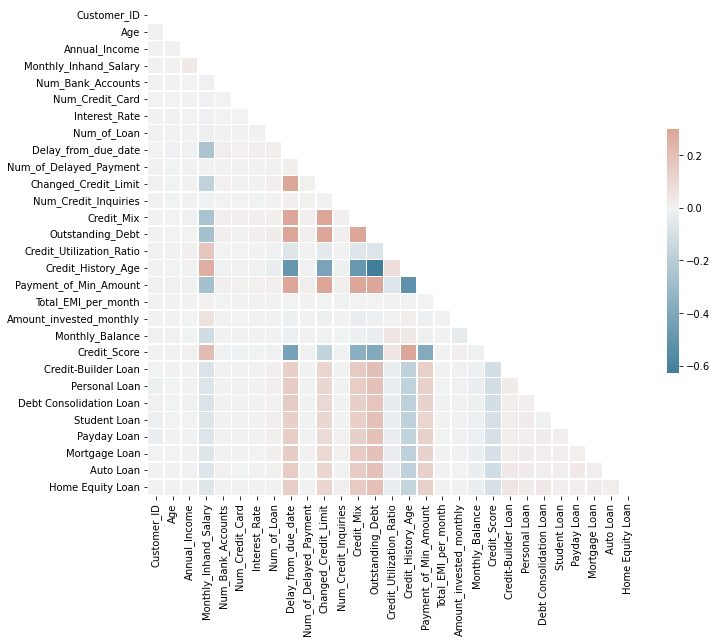

In [ ]:
#Correlation heatmap (from seaborn)
# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df2["Age_Group"] = pd.cut(
    df2.Age,
    bins=[14, 25, 30, 45, 55, 95, 120],
    labels=["14-25", "25-30", "30-45", "45-55", "55-95", "95-120"],
)
age_groups = (
    df2.groupby(["Age_Group", "Credit_Score"])[
        "Outstanding_Debt", "Annual_Income", "Num_Bank_Accounts", "Num_Credit_Card"
    ]
    .sum()
    .reset_index()
)
age_groups

<ipython-input-86-fa8a22349195>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Age_Group"] = pd.cut(
<ipython-input-86-fa8a22349195>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.groupby(["Age_Group", "Credit_Score"])[


,Age_Group,Credit_Score,Outstanding_Debt,Annual_Income,Num_Bank_Accounts,Num_Credit_Card
0,14-25,0.0,19005227.84,1.430461e+09,155713.0,200798.0
1,14-25,1.0,19952090.01,2.223223e+09,235203.0,284830.0
2,14-25,2.0,3137180.79,6.649730e+08,54482.0,101126.0
3,25-30,0.0,9617599.66,7.935326e+08,83892.0,118841.0
4,25-30,1.0,9651424.60,1.372142e+09,138251.0,173431.0
5,25-30,2.0,1825730.64,3.288637e+08,32019.0,44150.0
6,30-45,0.0,27033226.99,1.801417e+09,255940.0,304576.0
7,30-45,1.0,29682543.52,4.486899e+09,374210.0,497587.0
8,30-45,2.0,5646619.32,1.241155e+09,105112.0,133277.0
9,45-55,0.0,1596323.10,3.177945e+08,24789.0,34224.0


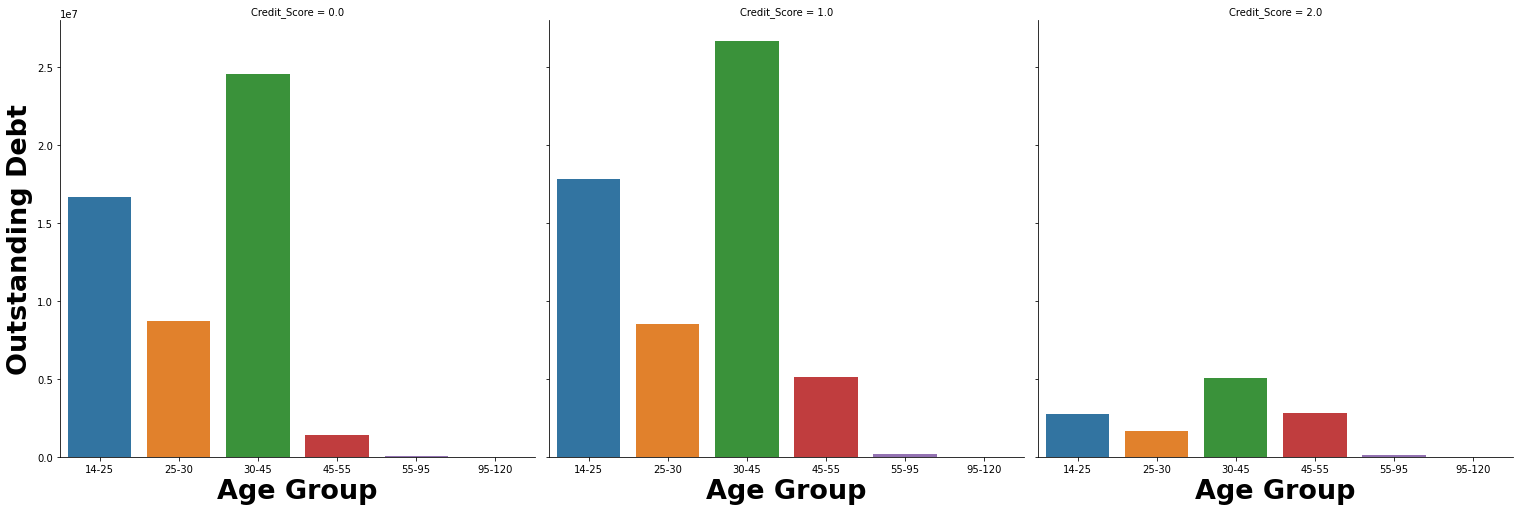

In [ ]:
g = sns.catplot(
    data=age_groups,
    x="Age_Group",
    y="Outstanding_Debt",
    height=7,
    aspect=1,
    col="Credit_Score",
    kind="bar",
    ci=None,
)
g.set_axis_labels("Age Group", "Outstanding Debt", size=27, fontweight="bold")
plt.show()

**Inference**: Overall in all credit groups, we can see that people with agegroup b/w 30-45 has higher outstanding debt.


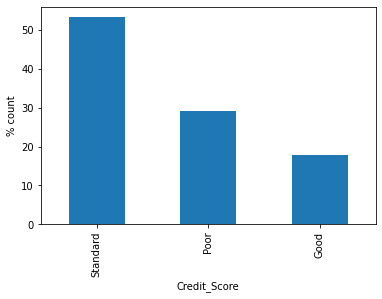

In [ ]:
# Plot % of Credit Score values
(df2['Credit_Score'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.ylabel('% count')
plt.xlabel('Credit_Score')
plt.show()

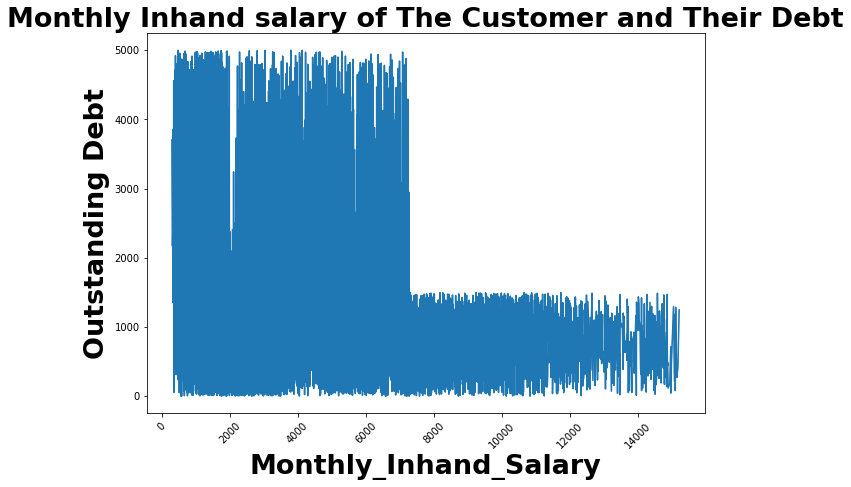

In [ ]:
plt.figure(figsize=(10, 7))
sns.lineplot(data=df2, x="Monthly_Inhand_Salary", y="Outstanding_Debt")
plt.xticks(rotation=45)
plt.title(
    "Monthly Inhand salary of The Customer and Their Debt", size=27, fontweight="bold"
)
plt.xlabel("Monthly_Inhand_Salary", size=27, fontweight="bold")
plt.ylabel("Outstanding Debt", size=27, fontweight="bold")
plt.show()

**Inference**: As Monthly Inhand Salary Increases, overallOutstanding debt is low

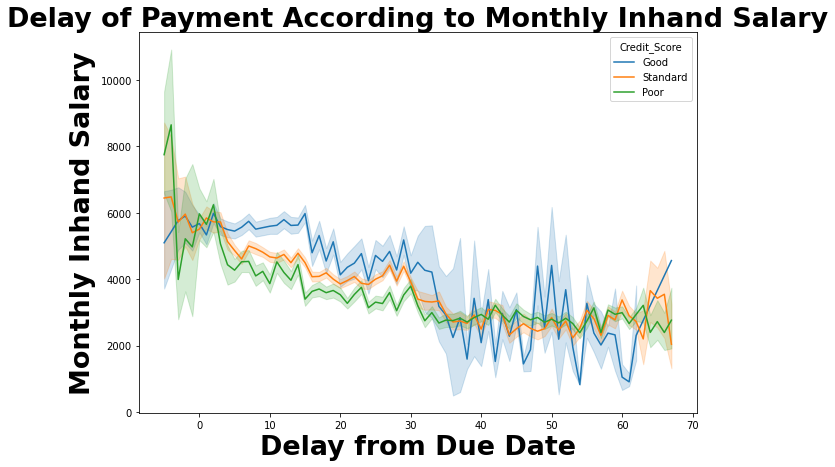

In [ ]:
plt.figure(figsize=(10, 7))
sns.lineplot(
    data=df2, x="Delay_from_due_date", y="Monthly_Inhand_Salary", hue="Credit_Score"
)
plt.title(
    "Delay of Payment According to Monthly Inhand Salary", size=27, fontweight="bold"
)
plt.xlabel("Delay from Due Date", size=27, fontweight="bold")
plt.ylabel("Monthly Inhand Salary", size=27, fontweight="bold")
plt.show()

**Inference**: Obvious to previous inference, as the the monthly salary is higher the delays are less frequent

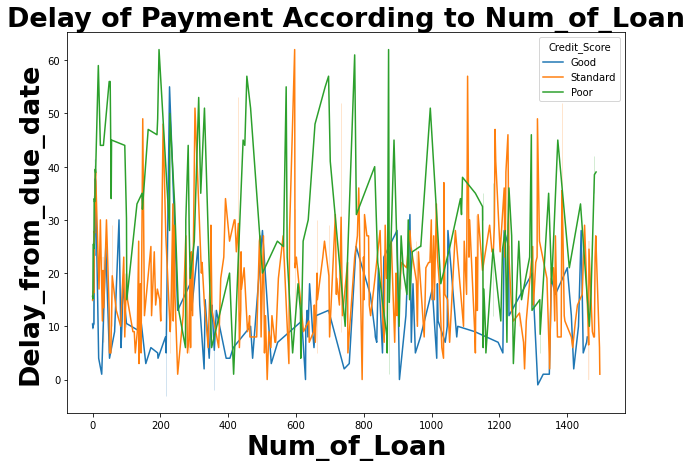

In [ ]:
plt.figure(figsize=(10, 7))
sns.lineplot(
    data=df2, x="Num_of_Loan", y="Delay_from_due_date", hue="Credit_Score"
)
plt.title(
    "Delay of Payment According to Num_of_Loan", size=27, fontweight="bold"
)
plt.xlabel("Num_of_Loan", size=27, fontweight="bold")
plt.ylabel("Delay_from_due_date", size=27, fontweight="bold")
plt.show()

**Inference**: Looks like the Num of Loan field doesnt correlate much to the credit score of customer. Its just random

In [ ]:
df2['Num_of_Loan'].value_counts().sort_index()

0.0       10930
1.0       10606
2.0       15032
3.0       15104
4.0       14743
          ...  
1482.0        1
1484.0        1
1485.0        1
1495.0        1
1496.0        1
Name: Num_of_Loan, Length: 413, dtype: int64

In [ ]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 89364 entries, 0x1602 to 0x2219d
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer_ID               89364 non-null  float64 
 1   Month                     89364 non-null  object  
 2   Age                       89364 non-null  float64 
 3   Occupation                89364 non-null  object  
 4   Annual_Income             89364 non-null  float64 
 5   Monthly_Inhand_Salary     89364 non-null  float64 
 6   Num_Bank_Accounts         89364 non-null  float64 
 7   Num_Credit_Card           89364 non-null  float64 
 8   Interest_Rate             89364 non-null  float64 
 9   Num_of_Loan               89364 non-null  float64 
 10  Delay_from_due_date       89364 non-null  float64 
 11  Num_of_Delayed_Payment    89364 non-null  float64 
 12  Changed_Credit_Limit      89364 non-null  float64 
 13  Num_Credit_Inquiries      89364 non-null  fl

In [ ]:
#Handle Categorical data using pd_dummies
df2 = pd.get_dummies(df2,drop_first=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89364 entries, 0x1602 to 0x2219d
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               89364 non-null  float64
 1   Age                       89364 non-null  float64
 2   Annual_Income             89364 non-null  float64
 3   Monthly_Inhand_Salary     89364 non-null  float64
 4   Num_Bank_Accounts         89364 non-null  float64
 5   Num_Credit_Card           89364 non-null  float64
 6   Interest_Rate             89364 non-null  float64
 7   Num_of_Loan               89364 non-null  float64
 8   Delay_from_due_date       89364 non-null  float64
 9   Num_of_Delayed_Payment    89364 non-null  float64
 10  Changed_Credit_Limit      89364 non-null  float64
 11  Num_Credit_Inquiries      89364 non-null  float64
 12  Credit_Mix                89364 non-null  float64
 13  Outstanding_Debt          89364 non-null  float64
 14  Cred

# 4.Identifying and Handling Outliers


In [ ]:
# Finding Outliers
def find_outliers(df2):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
outliers = find_outliers(df2['Num_Bank_Accounts'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers

In [ ]:
pip install datasist

In [ ]:
df2.drop('Customer_ID',axis = 1, inplace=True)

In [ ]:
df2.reset_index(inplace=True)

In [ ]:
#Drop ID from dataframe
df2.drop('ID',axis = 1, inplace=True)

In [ ]:
## replace Outliers with median 
from datasist.structdata import detect_outliers
for col in Num_variables :
    outliers_indecies = detect_outliers(df2,0,[col])
    median = df2[col].median()
    df2[col].iloc[outliers_indecies] = median

# Instead of using for, define as  a function and call as apply.

In [ ]:
# Saving the data frame into a csv file for future use.
df2.to_csv('processed_credit_score_df2.csv')

In [2]:
#Reading df2 from file
df2 = pd.read_csv('processed_credit_score_df2.csv', header =0)

In [ ]:
df2.head()

,Unnamed: 0,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Age_Group_25-30,Age_Group_30-45,Age_Group_45-55,Age_Group_55-95,Age_Group_95-120
0,0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0,0,1,0,0,0,0,0,0,0
1,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,7.0,...,0,0,1,0,0,0,0,0,0,0
2,2,33.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0,0,1,0,0,0,0,0,0,0
3,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,0,0,1,0,0,0,0,0,0,0
4,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,7.0,...,0,0,1,0,0,0,0,0,0,0


In [3]:
df2.drop('Unnamed: 0',axis=1,inplace=True)

# 5.Modelling

### 5.1 Setting Predictor and Target Variables

In [4]:
X=df2.drop(['Credit_Score'],axis=1)
y=df2["Credit_Score"] 

### 5.2 Split Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

### 5.3 Define Function to calculate & display model parameters

In [ ]:
def model_calc(clf,clfm):
  #fit train
  clfm.fit(X_train,y_train)
  y_pred=clfm.predict(X_test)
  y_pred_train=clfm.predict(X_train)
  y_train_prob = clfm.predict_proba(X_train)[:,1]
  y_test_prob = clfm.predict_proba(X_test)[:,1]
  #Score
  score = clfm.score(X_test,y_test)
  #training scode
  scoretr = clfm.score(X_train,y_train)
  #Mean squared error (test)
  MSQTR = mean_squared_error(y_train, y_pred_train)
  MSQ = mean_squared_error(y_test, y_pred)
  
  print('Model Name:', clf)
  print('--------------------------------')
  print('MSQ of Train dataset = {:+.04f}' .format(MSQTR))
  print('MSQ of Test dataset = {:+.04f}' .format(MSQ))
  print('accuracy of Train dataset = {:+.04f}' .format(scoretr))
  print('accuracy of Test dataset = {:+.04f}' .format(score))
  print('Classification report of training set')
  print(classification_report(y_train, y_pred_train))
  print('Confusion matrix of training set')
  print(confusion_matrix(y_train, y_pred_train,labels=[0,1,2]))
  print('Classification report of test set')
  print(classification_report(y_test, y_pred))
  print('Confusion matrix of test set')
  print(confusion_matrix(y_test, y_pred,labels=[0,1,2]))

### 5.4 Logistic Regression

In [ ]:
#Logistic regression 
clf = 'LogisticRegression()'
clfm = make_pipeline(StandardScaler(), LogisticRegression(random_state=27))
model_calc(clf,clfm)
print('############################################################')
#Logistic Regression CV
clf = 'LogisticRegressionCV()'
clfm = make_pipeline(StandardScaler(), LogisticRegressionCV(cv=10,random_state=1))
model_calc(clf,clfm)

Model Name: LogisticRegression()
--------------------------------
MSQ of Train dataset = +0.3955
MSQ of Test dataset = +0.3975
accuracy of Train dataset = +0.6465
accuracy of Test dataset = +0.6440
Classification report of training set
              precision    recall  f1-score   support

         0.0       0.67      0.53      0.59     20299
         1.0       0.65      0.77      0.71     37222
         2.0       0.58      0.46      0.51     12479

    accuracy                           0.65     70000
   macro avg       0.63      0.59      0.60     70000
weighted avg       0.65      0.65      0.64     70000

Confusion matrix of training set
[[10760  8706   833]
 [ 5106 28701  3415]
 [  147  6535  5797]]
Classification report of test set
              precision    recall  f1-score   support

         0.0       0.67      0.54      0.60      8699
         1.0       0.65      0.76      0.70     15952
         2.0       0.56      0.46      0.51      5349

    accuracy                      

### 5.5 Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = 'Gaussian Naive Bayes'
clfm = make_pipeline(StandardScaler(), GaussianNB())
model_calc(clf,clfm)

Model Name: Gaussian Naive Bayes
--------------------------------
MSQ of Train dataset = +0.5569
MSQ of Test dataset = +0.5532
accuracy of Train dataset = +0.6090
accuracy of Test dataset = +0.6096


### Support Vector Machines - WIP- takes long time


In [ ]:
from sklearn.svm import SVC
#SVM-SVC kernal = rbf
clf = 'SVM- SVC kernal=rbf'
clfm = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=0.001))
model_calc(clf,clfm)
print('############################################################')
#SVM-SVC kernal = linear
#clf = 'SVM- SVC kernal=linear'
#clfm = make_pipeline(StandardScaler(), SVC(kernel="linear", gamma=0.025,random_state=101))
#model_calc(clf,clfm)

### 5.6 Gradient Descent Model

In [ ]:
from sklearn.linear_model import SGDClassifier
clf = 'Stochastic Gradient Descent,loss=modified_huber'
clfm = make_pipeline(StandardScaler(), SGDClassifier(loss='modified_huber', penalty = 'l2',shuffle = True,random_state=101))
model_calc(clf,clfm)
print('############################################################')
clf = 'Stochastic Gradient Descent,loss=hinge'
clfm = make_pipeline(StandardScaler(), SGDClassifier(loss='hinge', penalty="l2", shuffle = True,random_state=101))
model_calc(clf,clfm)

Model Name: Stochastic Gradient Descent,loss=modified_huber
--------------------------------
MSQ of Train dataset = +0.4456
MSQ of Test dataset = +0.4453
accuracy of Train dataset = +0.6093
accuracy of Test dataset = +0.6075
Classification report of training set
              precision    recall  f1-score   support

         0.0       0.67      0.44      0.53     20299
         1.0       0.62      0.79      0.69     37222
         2.0       0.48      0.35      0.40     12479

    accuracy                           0.61     70000
   macro avg       0.59      0.53      0.54     70000
weighted avg       0.61      0.61      0.59     70000

Confusion matrix of training set
[[ 8908 10257  1134]
 [ 4277 29413  3532]
 [  148  7998  4333]]
Classification report of test set
              precision    recall  f1-score   support

         0.0       0.67      0.44      0.53      8699
         1.0       0.62      0.79      0.69     15952
         2.0       0.47      0.34      0.40      5349

    acc

AttributeError: ignored

### 5.7 KNN (Nearest Neighbours)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = 'KNN- Neighbour -3'
clfm = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
model_calc(clf,clfm)
print('############################################################')
clf = 'KNN- Neighbour -5'
clfm = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
model_calc(clf,clfm)

Model Name: KNN- Neighbour -3
--------------------------------
MSQ of Train dataset = +0.2057
MSQ of Test dataset = +0.4096
accuracy of Train dataset = +0.8462
accuracy of Test dataset = +0.6844
Classification report of training set
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83     20299
         1.0       0.88      0.86      0.87     37222
         2.0       0.84      0.77      0.80     12479

    accuracy                           0.85     70000
   macro avg       0.84      0.83      0.83     70000
weighted avg       0.85      0.85      0.85     70000

Confusion matrix of training set
[[17662  2376   261]
 [ 3643 31988  1591]
 [  950  1943  9586]]
Classification report of test set
              precision    recall  f1-score   support

         0.0       0.64      0.71      0.67      8699
         1.0       0.74      0.72      0.73     15952
         2.0       0.61      0.53      0.56      5349

    accuracy                         

### 5.8 Decision Tree


In [ ]:
clf = 'Decision Tree'
clfm = make_pipeline(StandardScaler(), DecisionTreeClassifier())
model_calc(clf,clfm)


Model Name: Decision Tree
--------------------------------
MSQ of Train dataset = +0.0000
MSQ of Test dataset = +0.3117
accuracy of Train dataset = +1.0000
accuracy of Test dataset = +0.7240
Classification report of training set
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20299
         1.0       1.00      1.00      1.00     37222
         2.0       1.00      1.00      1.00     12479

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000

Confusion matrix of training set
[[20299     0     0]
 [    0 37222     0]
 [    0     0 12479]]
Classification report of test set
              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71      8699
         1.0       0.75      0.75      0.75     15952
         2.0       0.66      0.66      0.66      5349

    accuracy                           0.

### 5.9 Random Forests Classifier

In [ ]:
clf = 'Random Forest'
clfm = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='entropy',random_state=1))
model_calc(clf,clfm)
#accuracy for criterion = gini = 0.8095

Model Name: Random Forest
--------------------------------
MSQ of Train dataset = +0.0000
MSQ of Test dataset = +0.1977
accuracy of Train dataset = +1.0000
accuracy of Test dataset = +0.8080
Classification report of training set
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20299
         1.0       1.00      1.00      1.00     37222
         2.0       1.00      1.00      1.00     12479

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000

Confusion matrix of training set
[[20299     0     0]
 [    0 37222     0]
 [    0     0 12479]]
Classification report of test set
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81      8699
         1.0       0.82      0.82      0.82     15952
         2.0       0.78      0.73      0.76      5349

    accuracy                           0.

### 5.10 Stacking Classifier

In [6]:
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier

In [7]:
#Bagging
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
randomForest = RandomForestClassifier(criterion='entropy',random_state=1)
histGradientBoosting = HistGradientBoostingClassifier()
XGB = XGBClassifier(n_jobs=-1)

clfm = make_pipeline(StandardScaler(), StackingClassifier([
    ('bagging', bagging),
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradientBoosting', histGradientBoosting),
    ('XGB', XGB)
], n_jobs=-1))

clfm.fit(X_train, y_train)
clfm.score(X_test, y_test)

y_pred = clfm.predict(X_test)
y_train_pred = clfm.predict(X_train)
ac = accuracy_score(y_test,y_pred)
act = accuracy_score(y_train,y_train_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Model
Accuracy is:  0.9994
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20299
         1.0       1.00      1.00      1.00     37222
         2.0       1.00      1.00      1.00     12479

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000



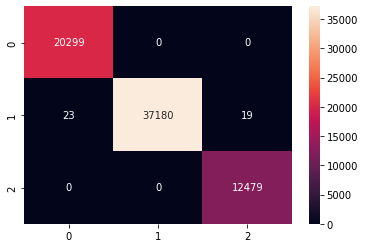

In [8]:
print('Training Model')
print('Accuracy is: ',act)
cmt = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cmt,annot=True,fmt="d");
print(classification_report(y_train, y_train_pred))


################################
Testing Model
Accuracy is:  0.8132
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82      8699
         1.0       0.83      0.82      0.82     15952
         2.0       0.79      0.76      0.77      5349

    accuracy                           0.81     30000
   macro avg       0.81      0.80      0.81     30000
weighted avg       0.81      0.81      0.81     30000



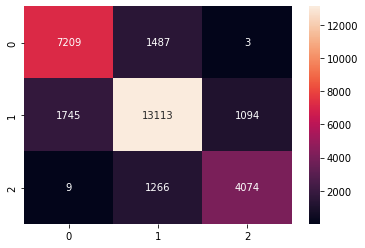

In [9]:
print('################################')
print('Testing Model')
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

#Inference from model testing.
Random forests is the best model out of all the models. 
Also Data is IMBALANCED . Hence trying to improve the model by balancing the target variable

In [ ]:
y.value_counts(normalize=True)

1.0    0.53174
0.0    0.28998
2.0    0.17828
Name: Credit_Score, dtype: float64

# 6.Balancing the dataset



In [14]:
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy='auto')
X_data_rus, y_data_rus = rus.fit_resample(X, y)

In [15]:
#Appy Oversampling Balance technique - SMOTE to train set separately
from imblearn.over_sampling import SMOTE
X_data_rus_train,y_data_rus_train = rus.fit_resample(X_train, y_train)
#X_data_rus_test,y_data_rus_test = rus.fit_resample(X_test, y_test)

# 7.Random Forest model results using balanced train data (THIS IS CORRECT APPROACH)

Accuracy is:  0.7692333333333333
              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79      8700
         1.0       0.83      0.75      0.79     15952
         2.0       0.63      0.76      0.69      5348

    accuracy                           0.77     30000
   macro avg       0.74      0.77      0.76     30000
weighted avg       0.78      0.77      0.77     30000



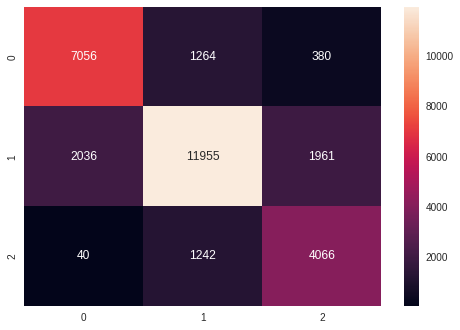

In [16]:
clfm = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='entropy',random_state=1))
clfm.fit(X_data_rus_train, y_data_rus_train)
clfm.score(X_test, y_test)

y_pred = clfm.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

## 7.1 Random Forests using Unbalanced Train and Balanced Test data.

Accuracy is:  0.7731736877298563
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84     15952
         1.0       0.63      0.82      0.71     15952
         2.0       0.90      0.70      0.78     15952

    accuracy                           0.77     47856
   macro avg       0.80      0.77      0.78     47856
weighted avg       0.80      0.77      0.78     47856



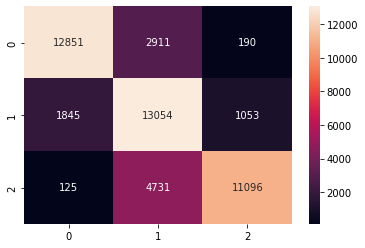

In [10]:
clfm = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='entropy',random_state=1))
clfm.fit(X_train, y_train)
clfm.score(X_data_rus_test, y_data_rus_test)

y_pred = clfm.predict(X_data_rus_test)
ac = accuracy_score(y_data_rus_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_data_rus_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_data_rus_test, y_pred))

### 7.2 Random Forest Classifier using Balanced train and test data

Accuracy is:  0.8230942828485457
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84     15952
         1.0       0.80      0.75      0.78     15952
         2.0       0.81      0.89      0.85     15952

    accuracy                           0.82     47856
   macro avg       0.82      0.82      0.82     47856
weighted avg       0.82      0.82      0.82     47856



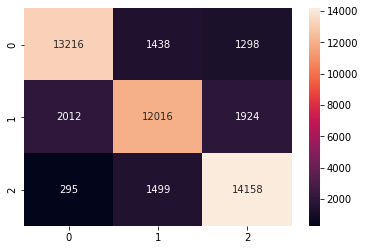

In [11]:
clfm = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='entropy',random_state=1))
clfm.fit(X_data_rus_train, y_data_rus_train)
clfm.score(X_data_rus_test, y_data_rus_test)

y_pred = clfm.predict(X_data_rus_test)
ac = accuracy_score(y_data_rus_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_data_rus_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_data_rus_test, y_pred))

# 8.Random Forest model results after balancing the entire dataset

Accuracy is:  0.8485488016382139
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     15952
         1.0       0.85      0.73      0.79     15952
         2.0       0.84      0.93      0.88     15953

    accuracy                           0.85     47857
   macro avg       0.85      0.85      0.85     47857
weighted avg       0.85      0.85      0.85     47857



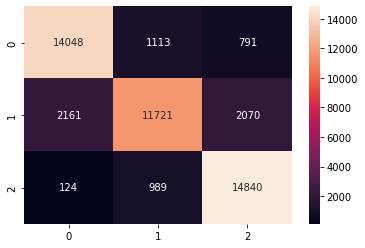

In [ ]:
target_col = 'Credit_Score'
feature_cols = [c for c in df2.columns if c != target_col]

#X =  df2[feature_cols]
#y = df2[target_col]

X_train, X_test, y_train, y_test = train_test_split(X_data_rus, y_data_rus, test_size=0.3, random_state=42,stratify=y_data_rus)

clfm = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='entropy',random_state=1))
clfm.fit(X_train, y_train)
clfm.score(X_test, y_test)

y_pred = clfm.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

# 9.Feature Selection using Random Forests

In [17]:
from sklearn.feature_selection import SelectFromModel

In [18]:
sel = SelectFromModel(RandomForestClassifier(criterion='entropy',random_state=1))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='entropy',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=Fal

In [19]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

19

In [20]:
print(selected_feat)

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')


In [ ]:
pd.Series(sel.estimator_,rf.feature_importances_.ravel()).hist()

ValueError: ignored

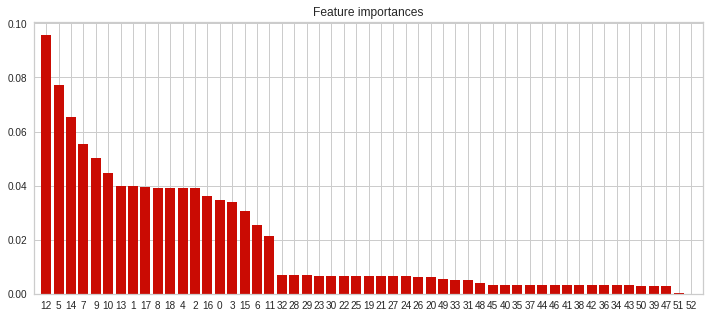

Legend Mapping 

[12  5 14  7  9 10 13  1 17  8 18  4  2 16  0  3 15  6 11 32 28 29 23 30
 22 25 19 21 27 24 26 20 49 33 31 48 45 40 35 37 44 46 41 38 42 36 34 43
 50 39 47 51 52] - Index(['Outstanding_Debt', 'Interest_Rate', 'Credit_History_Age',
       'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Annual_Income', 'Amount_invested_monthly',
       'Num_of_Delayed_Payment', 'Monthly_Balance', 'Num_Credit_Card',
       'Monthly_Inhand_Salary', 'Total_EMI_per_month', 'Age',
       'Num_Bank_Accounts', 'Payment_of_Min_Amount', 'Num_of_Loan',
       'Credit_Mix', 'Month_March', 'Month_February', 'Month_January',
       'Payday Loan', 'Month_July', 'Student Loan', 'Auto Loan',
       'Credit-Builder Loan', 'Debt Consolidation Loan', 'Month_August',
       'Mortgage Loan', 'Home Equity Loan', 'Personal Loan', 'Age_Group_30-45',
       'Month_May', 'Month_June', 'Age_Group_25-30', 'Occupation_Scientist',
       'Occupation_Lawyer', 

In [21]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure(figsize=(12,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]),importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()
print('Legend Mapping \n')
print(indices,'-',X_train.columns[indices])

# 10.Rerun the random forest classifier using selected 19 features (balanced Train data)

In [22]:
target_col = 'Credit_Score'
feature_cols = [c for c in selected_feat if c != target_col]
X =  df2[feature_cols]
y = df2[target_col] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

#Apply Balancing on Train data
X_data_rus_train,y_data_rus_train = rus.fit_resample(X_train, y_train)

clfm = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='entropy',random_state=1))
clfm.fit(X_data_rus_train, y_data_rus_train)
clfm.score(X_test, y_test)

y_pred = clfm.predict(X_test)
y_train_pred = clfm.predict(X_data_rus_train)
ac = accuracy_score(y_test,y_pred)
act= accuracy_score(y_data_rus_train,y_train_pred)


print('Training Model')
print('Accuracy is: ',act)
cmt = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cmt,annot=True,fmt="d");
print(classification_report(y_train, y_train_pred))
print('################################')
print('Testing Model')
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

Training Model
Accuracy is:  0.9999910447226551


ValueError: ignored

### 10.1 Old code(Random forests on unbalanced dataset)


Accuracy is:  0.7987666666666666
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81      8699
         1.0       0.82      0.81      0.81     15952
         2.0       0.76      0.72      0.74      5349

    accuracy                           0.80     30000
   macro avg       0.79      0.79      0.79     30000
weighted avg       0.80      0.80      0.80     30000



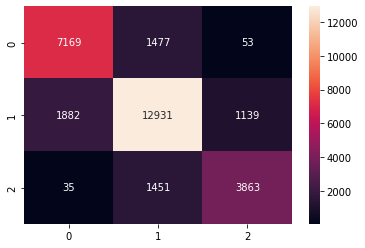

In [24]:
target_col = 'Credit_Score'
feature_cols = [c for c in selected_feat if c != target_col]
X =  df2[feature_cols]
y = df2[target_col] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

clfm = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='entropy',random_state=1))
clfm.fit(X_train, y_train)
clfm.score(X_test, y_test)

y_pred = clfm.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

# 11.XGBoost

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Accuracy is:  0.7337693545353867
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.76     15952
         1.0       0.74      0.56      0.64     15952
         2.0       0.71      0.88      0.78     15953

    accuracy                           0.73     47857
   macro avg       0.74      0.73      0.73     47857
weighted avg       0.74      0.73      0.73     47857



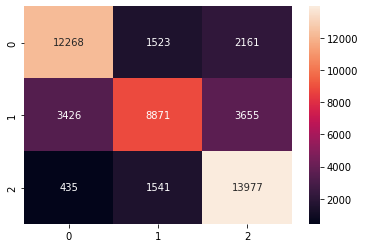

In [ ]:
from xgboost import XGBClassifier

target_col = 'Credit_Score'
feature_cols = [c for c in selected_feat if c != target_col]
X =  X_data_rus[feature_cols]
y = y_data_rus 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

clfm = make_pipeline(StandardScaler(),  XGBClassifier())
clfm.fit(X_train, y_train)
clfm.score(X_test, y_test)

y_pred = clfm.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))



# 12.Stacking multiple week models

In [ ]:
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)

In [25]:
#Bagging
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
randomForest = RandomForestClassifier(criterion='entropy',random_state=1)
histGradientBoosting = HistGradientBoostingClassifier()
XGB = XGBClassifier(n_jobs=-1)

clfm = make_pipeline(StandardScaler(), StackingClassifier([
    ('bagging', bagging),
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradientBoosting', histGradientBoosting),
    ('XGB', XGB)
], n_jobs=-1))

clfm.fit(X_train, y_train)
clfm.score(X_test, y_test)

y_pred = clfm.predict(X_test)
y_train_pred = clfm.predict(X_train)
ac = accuracy_score(y_test,y_pred)
act = accuracy_score(y_train,y_train_pred)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 12.1 Final Metrics (with Imbalanced train and test dataset (original X&y))

Training Model
Accuracy is:  0.9995428571428572
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20299
         1.0       1.00      1.00      1.00     37222
         2.0       1.00      1.00      1.00     12479

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000

################################
Testing Model
Accuracy is:  0.7981
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80      8699
         1.0       0.81      0.82      0.81     15952
         2.0       0.77      0.73      0.75      5349

    accuracy                           0.80     30000
   macro avg       0.79      0.78      0.79     30000
weighted avg       0.80      0.80      0.80     30000



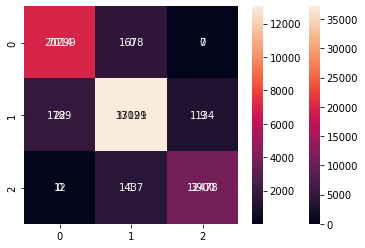

In [26]:
#Final Metrics (with Imbalanced train and test dataset (original X&y))
print('Training Model')
print('Accuracy is: ',act)
cmt = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cmt,annot=True,fmt="d");
print(classification_report(y_train, y_train_pred))
print('################################')
print('Testing Model')
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

### 12.2 Final Metrics - Training and Testing Model Results


Training Model
Accuracy is:  0.9995432767653248
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     37222
         1.0       1.00      1.00      1.00     37222
         2.0       1.00      1.00      1.00     37221

    accuracy                           1.00    111665
   macro avg       1.00      1.00      1.00    111665
weighted avg       1.00      1.00      1.00    111665

################################


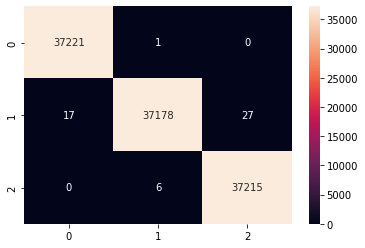

In [ ]:
print('Training Model')
print('Accuracy is: ',act)
cmt = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cmt,annot=True,fmt="d");
print(classification_report(y_train, y_train_pred))
print('################################')


Testing Model
Accuracy is:  0.8773220218567817
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     15952
         1.0       0.85      0.79      0.82     15952
         2.0       0.91      0.93      0.92     15953

    accuracy                           0.88     47857
   macro avg       0.88      0.88      0.88     47857
weighted avg       0.88      0.88      0.88     47857



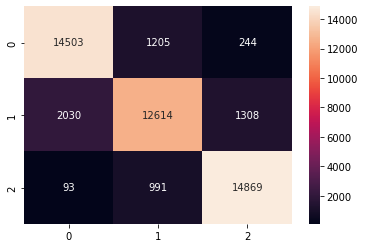

In [ ]:
print('Testing Model')
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

In [ ]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [ ]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [ ]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

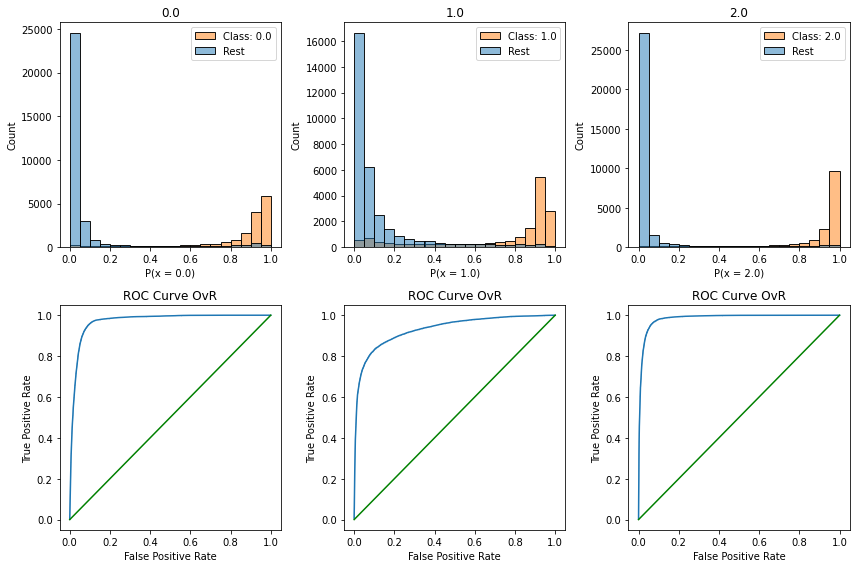

In [ ]:
#ROC curve

# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
classes = clfm.classes_
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

In [ ]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

0.0 ROC AUC OvR: 0.9707
1.0 ROC AUC OvR: 0.9312
2.0 ROC AUC OvR: 0.9845
average ROC AUC OvR: 0.9621


# 13.Hyper Parameter Tuning using Optuna

In [ ]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 9.3 MB/s eta 0:00:00


In [ ]:
def objective(trial):
  n_estimators = trial.suggest_int('n_estimators', 2, 20)
  max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
  bagging = BaggingClassifier(n_jobs=-1)
  extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
  randomForest = RandomForestClassifier(criterion='entropy',random_state=1,n_estimators=n_estimators, max_depth=max_depth)
  histGradientBoosting = HistGradientBoostingClassifier()
  XGB = XGBClassifier(n_jobs=-1)

  clfm = make_pipeline(StandardScaler(), StackingClassifier([
      ('bagging', bagging),
      ('extraTress', extraTrees),
      ('randomforest', randomForest),
      ('histGradientBoosting', histGradientBoosting),
      ('XGB', XGB)
    ], n_jobs=-1))

  #clfm.fit(X_train, y_train)
  #clfm.score(X_test, y_test)
  return sklearn.model_selection.cross_val_score(clfm, X_test,y_test, 
           n_jobs=-1, cv=3).mean()
  #y_pred = clfm.predict(X_test)
  #ac = accuracy_score(y_test,y_pred)
  #print('Accuracy is: ',ac)
  #cm = confusion_matrix(y_test, y_pred)
  #sns.heatmap(cm,annot=True,fmt="d");
  #print(classification_report(y_test, y_pred))

In [ ]:
import optuna
from optuna.samplers import TPESampler
study = optuna.create_study(sampler=TPESampler(),direction='maximize')
study.optimize(objective, n_trials=10)

[I 2023-01-21 00:30:02,937] A new study created in memory with name: no-name-410e7e41-055f-4104-8cc1-9a7e9ee2f2c8
<ipython-input-26-afc702690e78>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
[I 2023-01-21 00:33:17,456] Trial 0 finished with value: 0.8040620665775089 and parameters: {'n_estimators': 17, 'max_depth': 14.569377688343256}. Best is trial 0 with value: 0.8040620665775089.
<ipython-input-26-afc702690e78>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
[I 2023-01-21 00:36:16,425] Trial 1 finished with value: 

In [ ]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.8061934542108115
Best hyperparameters: {'n_estimators': 5, 'max_depth': 25.027690298699266}


# 14.Model Comparison (Using imbalanced original dataset) using pycaret


In [8]:
#pip install imbalanced-learn==0.7.0
pip install --user -U scikit-learn==0.23.2

SyntaxError: ignored

In [7]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
 pip install numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
pip install scikit-learn==0.23.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 14.1 Using Imbalanced Data

In [10]:
sklearn.__version__

'0.23.2'

In [12]:
import pycaret
from pycaret.classification import *
clfm = setup(data = df2,  target = 'Credit_Score',feature_selection=True,data_split_stratify=True)

,Description,Value
0,session_id,4691
1,Target,Credit_Score
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(100000, 54)"
5,Missing Values,False
6,Numeric Features,17
7,Categorical Features,36
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Credit_Score',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('fix_perfect', Remove_100(target='Credit_Score')),
                ('clean_names', Clean_Colum_Names()),
              

In [13]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8126,0.9101,0.8039,0.8127,0.8124,0.6885,0.6886,15.419
rf,Random Forest Classifier,0.8008,0.9055,0.7856,0.8006,0.8004,0.6675,0.6677,20.281
lightgbm,Light Gradient Boosting Machine,0.7263,0.8607,0.6959,0.7262,0.7253,0.5383,0.5392,3.130
knn,K Neighbors Classifier,0.7243,0.8478,0.6929,0.7225,0.7224,0.5378,0.5384,1.462
dt,Decision Tree Classifier,0.7158,0.7565,0.6975,0.7157,0.7157,0.5270,0.5270,1.640
gbc,Gradient Boosting Classifier,0.6950,0.8294,0.6525,0.6943,0.6926,0.4801,0.4822,79.932
ada,Ada Boost Classifier,0.6493,0.7255,0.5889,0.6468,0.6425,0.3900,0.3950,5.333
lda,Linear Discriminant Analysis,0.6453,0.7713,0.5954,0.6422,0.6413,0.3927,0.3949,0.772
ridge,Ridge Classifier,0.6220,0.0000,0.5216,0.6127,0.5999,0.3170,0.3302,0.123
qda,Quadratic Discriminant Analysis,0.6209,0.7735,0.6661,0.6693,0.6218,0.4229,0.4404,0.354


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=4691, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=4691, verbose=0,
                     warm_start=False)